#### Importing Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#### Importing Dataset

In [3]:
df = pd.read_csv("/media/farhan/New Volume2/Data Analysis Projects/Datasets/archive/student_scores.csv")
print(df.head(5))

   Unnamed: 0  Gender EthnicGroup          ParentEduc     LunchType TestPrep  \
0           0  female         NaN   bachelor's degree      standard     none   
1           1  female     group C        some college      standard      NaN   
2           2  female     group B     master's degree      standard     none   
3           3    male     group A  associate's degree  free/reduced     none   
4           4    male     group C        some college      standard     none   

  ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings TransportMeans  \
0             married     regularly          yes         3.0     school_bus   
1             married     sometimes          yes         0.0            NaN   
2              single     sometimes          yes         4.0     school_bus   
3             married         never           no         1.0            NaN   
4             married     sometimes          yes         0.0     school_bus   

  WklyStudyHours  MathScore  ReadingScore  W

In [4]:
df.describe()

,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore
count,30641.000000,29069.000000,30641.000000,30641.000000,30641.000000
mean,499.556607,2.145894,66.558402,69.377533,68.418622
std,288.747894,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,0.000000,10.000000,4.000000
25%,249.000000,1.000000,56.000000,59.000000,58.000000
50%,500.000000,2.000000,67.000000,70.000000,69.000000
75%,750.000000,3.000000,78.000000,80.000000,79.000000
max,999.000000,7.000000,100.000000,100.000000,100.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


In [6]:
df['MathScore'], ['PracticeScore'], ['ReadingScore'], ['WritingScore']

(0        71
 1        69
 2        87
 3        45
 4        76
          ..
 30636    59
 30637    58
 30638    61
 30639    82
 30640    64
 Name: MathScore, Length: 30641, dtype: int64,
 ['PracticeScore'],
 ['ReadingScore'],
 ['WritingScore'])

#### Total null values

In [7]:
df.isnull().sum()

Unnamed: 0                0
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

#### Delete Unnamed column

In [8]:
df = df.drop('Unnamed: 0', axis=1) #deleting unnamed column from horizontal axis
df.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


#### Male vs Female ratio in the dataset

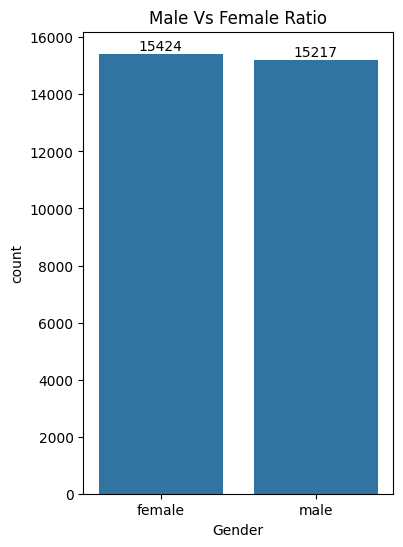

In [34]:
plt.figure(figsize=(4,6))
ax = sns.countplot(data = df, x = 'Gender')
ax.bar_label(ax.containers[0])
plt.title("Male Vs Female Ratio")
plt.show()

In [10]:
#To see the unique values
print(df["WklyStudyHours"].unique())
print(df['EthnicGroup'].unique())
print(df['ParentEduc'].unique())

['< 5' '5 - 10' '> 10' nan]
[nan 'group C' 'group B' 'group A' 'group D' 'group E']
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school' nan]


#### Parent Education Impact on scores

In [11]:
df.columns

Index(['Gender', 'EthnicGroup', 'ParentEduc', 'LunchType', 'TestPrep',
       'ParentMaritalStatus', 'PracticeSport', 'IsFirstChild', 'NrSiblings',
       'TransportMeans', 'WklyStudyHours', 'MathScore', 'ReadingScore',
       'WritingScore'],
      dtype='object')

In [12]:
gb = df.groupby("ParentEduc").agg({"MathScore":'mean', "ReadingScore":'mean', "WritingScore":'mean'})
print(gb)

                    MathScore  ReadingScore  WritingScore
ParentEduc                                               
associate's degree  68.365586     71.124324     70.299099
bachelor's degree   70.466627     73.062020     73.331069
high school         64.435731     67.213997     65.421136
master's degree     72.336134     75.832921     76.356896
some college        66.390472     69.179708     68.501432
some high school    62.584013     65.510785     63.632409


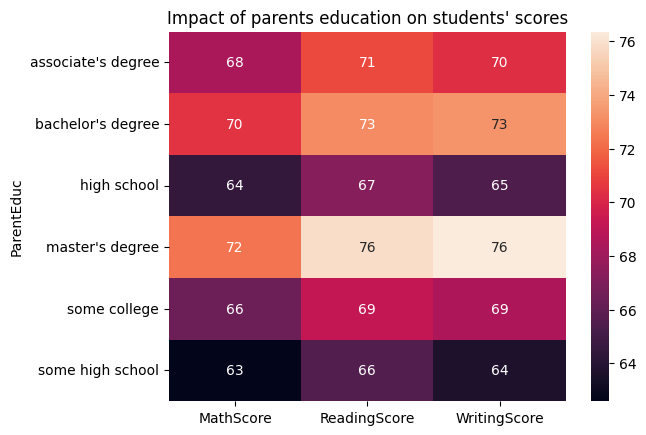

In [35]:
sns.heatmap(gb, annot=True)
plt.title("Impact of parents education on students' scores")
plt.show()

#### LunchType Impact on Scores

In [14]:
gbLunch = df.groupby("LunchType").agg({"MathScore":'mean', "ReadingScore":'mean', "WritingScore":'mean'})
print(gbLunch)

              MathScore  ReadingScore  WritingScore
LunchType                                          
free/reduced  58.862332     64.189735     62.650522
standard      70.709370     72.175634     71.529716


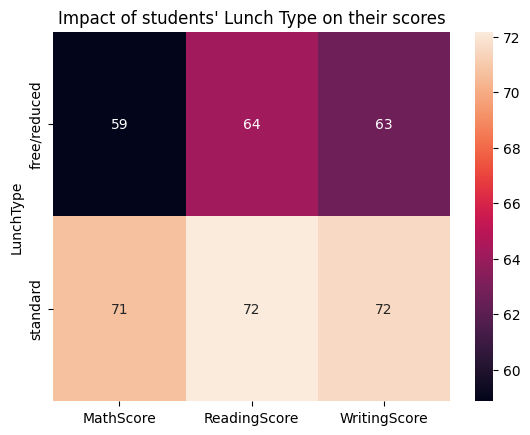

In [36]:
sns.heatmap(gbLunch, annot=True)
plt.title("Impact of students' Lunch Type on their scores")
plt.show()

#### Detecting Outliers In different scores

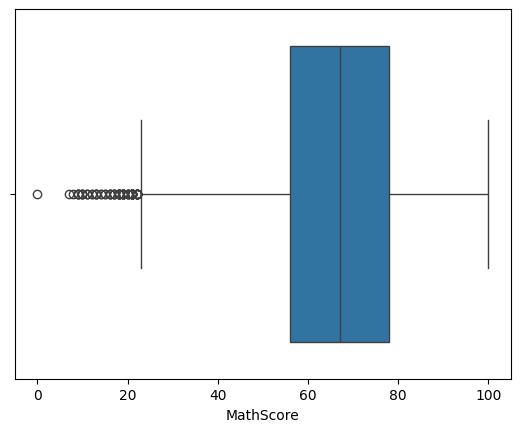

In [16]:
sns.boxplot(data = df, x = "MathScore")
plt.show()

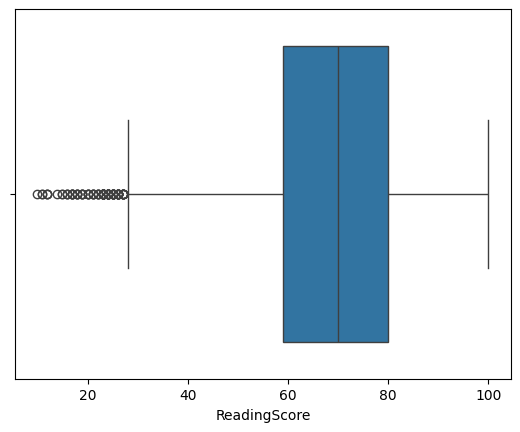

In [17]:
sns.boxplot(data = df, x = "ReadingScore")
plt.show()

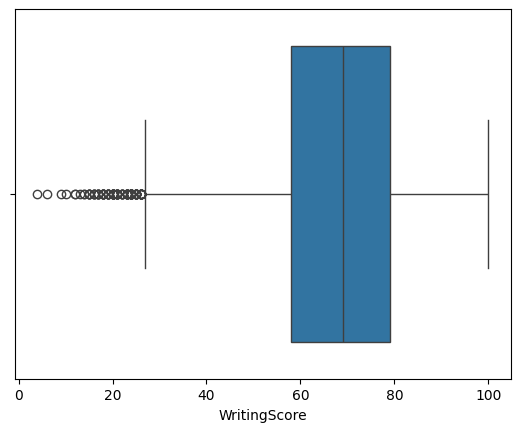

In [18]:
sns.boxplot(data = df, x = "WritingScore")
plt.show()

#### Ethnic Group Distribution

In [19]:
print(df["EthnicGroup"].unique())

[nan 'group C' 'group B' 'group A' 'group D' 'group E']


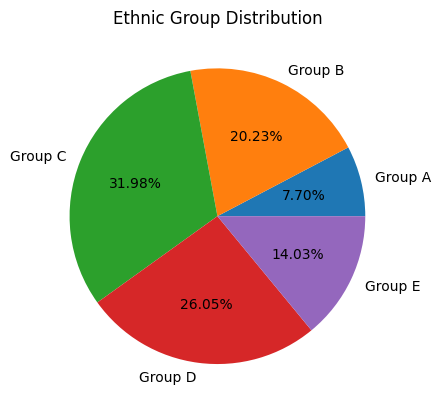

In [37]:
groupA = df.loc[(df["EthnicGroup"] == "group A")].count()
groupB = df.loc[(df["EthnicGroup"] == "group B")].count()
groupC = df.loc[(df["EthnicGroup"] == "group C")].count()
groupD = df.loc[(df["EthnicGroup"] == "group D")].count()
groupE = df.loc[(df["EthnicGroup"] == "group E")].count()

groupName = ['Group A', 'Group B', 'Group C', 'Group D', 'Group E']
groupList = [groupA["EthnicGroup"], groupB["EthnicGroup"], groupC["EthnicGroup"], groupD["EthnicGroup"], groupE["EthnicGroup"]]
plt.pie(groupList, labels = groupName, autopct='%1.2f%%')
plt.title("Ethnic Group Distribution")
plt.show()

#### EthnicGroup Impact on Marks

In [28]:
gbEthnic = df.groupby("EthnicGroup").agg({"MathScore":'mean', "ReadingScore":'mean', "WritingScore":'mean'})
print(gbEthnic)

             MathScore  ReadingScore  WritingScore
EthnicGroup                                       
group A      62.991888     66.787742     65.251915
group B      63.490216     67.320460     65.895125
group C      64.695723     68.438233     66.999240
group D      67.666400     70.382247     70.890844
group E      75.298936     74.251423     72.677060


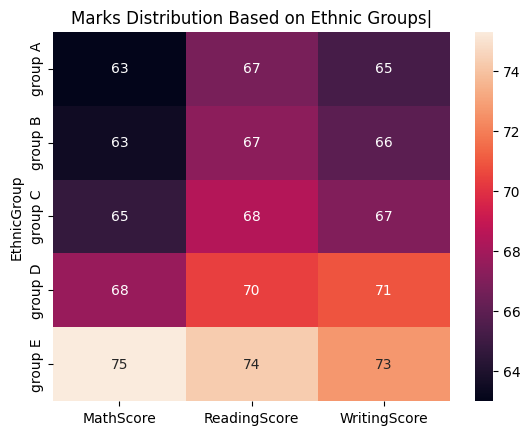

In [38]:
sns.heatmap(gbEthnic, annot=True)
plt.title("Marks Distribution Based on Ethnic Groups|")
plt.show()

In [30]:
print(df.head())

   Gender EthnicGroup          ParentEduc     LunchType TestPrep  \
0  female         NaN   bachelor's degree      standard     none   
1  female     group C        some college      standard      NaN   
2  female     group B     master's degree      standard     none   
3    male     group A  associate's degree  free/reduced     none   
4    male     group C        some college      standard     none   

  ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings TransportMeans  \
0             married     regularly          yes         3.0     school_bus   
1             married     sometimes          yes         0.0            NaN   
2              single     sometimes          yes         4.0     school_bus   
3             married         never           no         1.0            NaN   
4             married     sometimes          yes         0.0     school_bus   

  WklyStudyHours  MathScore  ReadingScore  WritingScore  
0            < 5         71            71            74  


#### Impact of co-curricular acitvites on scores

In [31]:
print(df["PracticeSport"].unique())

['regularly' 'sometimes' 'never' nan]


In [32]:
gbSport = df.groupby("PracticeSport").agg({"MathScore":'mean', "ReadingScore":'mean', "WritingScore":'mean'})
print(gbSport)

               MathScore  ReadingScore  WritingScore
PracticeSport                                       
never          64.171079     68.337662     66.522727
regularly      67.839155     69.943019     69.604003
sometimes      66.274831     69.241307     68.072438


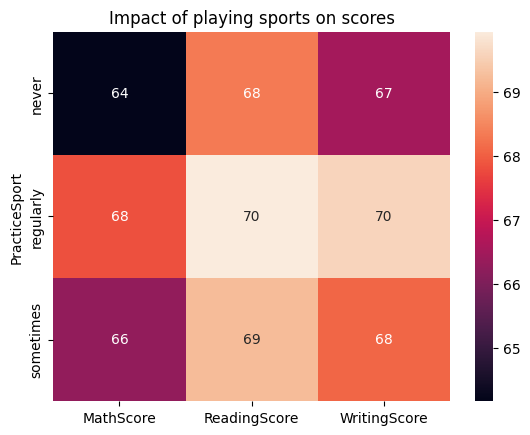

In [39]:
sns.heatmap(gbSport, annot=True)
plt.title("Impact of playing sports on scores")
plt.show()

#### Marks distribution based on tranportation service

In [41]:
print(df["Is"].unique())

['school_bus' nan 'private']


In [43]:
gbTransport = df.groupby("IsFirstChild").agg({'MathScore':'mean', 'ReadingScore':'mean', 'WritingScore':'mean'})
print(gbTransport)

              MathScore  ReadingScore  WritingScore
IsFirstChild                                       
no            66.246832     69.132614     68.210887
yes           66.740646     69.542553     68.558484
